In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [4]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
pymaceuticals_data = pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pymaceuticals_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
 # Checking the number of mice.
number_of_mice = len(pymaceuticals_data["Mouse ID"])
number_of_mice

1893

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pymaceuticals_data.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_mice

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceuticals_clean = pymaceuticals_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'],keep='first',inplace=False)
pymaceuticals_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
 # Checking the number of mice in the clean DataFrame.
total_mice = len(pymaceuticals_clean["Mouse ID"])
total_mice

1888

# Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
grouped = pymaceuticals_clean.groupby('Drug Regimen')
summary_table = round(grouped.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"], 2)
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# Bar & Pie Charts

In [11]:
regimen = pymaceuticals_clean.groupby(['Drug Regimen']).count()['Mouse ID']
regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [12]:
x_axis = np.arange(len(regimen)) 

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
# tick locations horizontal?
plt.bar(x_axis, regimen, color='pink', alpha=1, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation='vertical')


plt.title("Total Mice Treated")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout()
plt.savefig("Total Mice Bar Plot.png")
plt.show()

<IPython.core.display.Javascript object>

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = pymaceuticals_clean.groupby(["Mouse ID","Sex"])
gender

In [15]:
gender_df = pd.DataFrame(gender.size())
gender_df

,,0
Mouse ID,Sex,
a203,Female,10
a251,Female,10
a262,Female,10
a275,Female,10
a366,Female,7
...,...,...
z435,Female,3
z578,Male,10
z581,Female,10


In [16]:
gender_data = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender_data.columns = ["Total Count"]
gender_data

,Total Count
Sex,
Female,124
Male,125


In [17]:
gender_data["Gender by Percentage"] = round(100*(gender_data["Total Count"]/gender_data["Total Count"].sum()), 2)
gender_data

,Total Count,Gender by Percentage
Sex,,
Female,124,49.8
Male,125,50.2


In [18]:
labels = ["Female", "Male"]
colors = ["pink", "lightblue"]
explode = (0.1, 0)

In [19]:
plot = gender_data.plot.pie(y='Total Count', explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()
plt.savefig("Mice Male vs. Female Piechart.png")

<IPython.core.display.Javascript object>

# Pie Plot With Python

In [33]:
gender_dataframe = pd.DataFrame(pymaceuticals_clean.groupby(["Sex"]).count()).reset_index()
gender_dataframe.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,930,930,930,930,930,930,930
1,Male,958,958,958,958,958,958,958


In [37]:
gender_dataframe = gender_dataframe[["Sex","Mouse ID"]]
gender_dataframe = gender_dataframe.rename(columns={"Mouse ID": "Total Count"})
gender_dataframe.head()

KeyError: "['Mouse ID'] not in index"

<IPython.core.display.Javascript object>


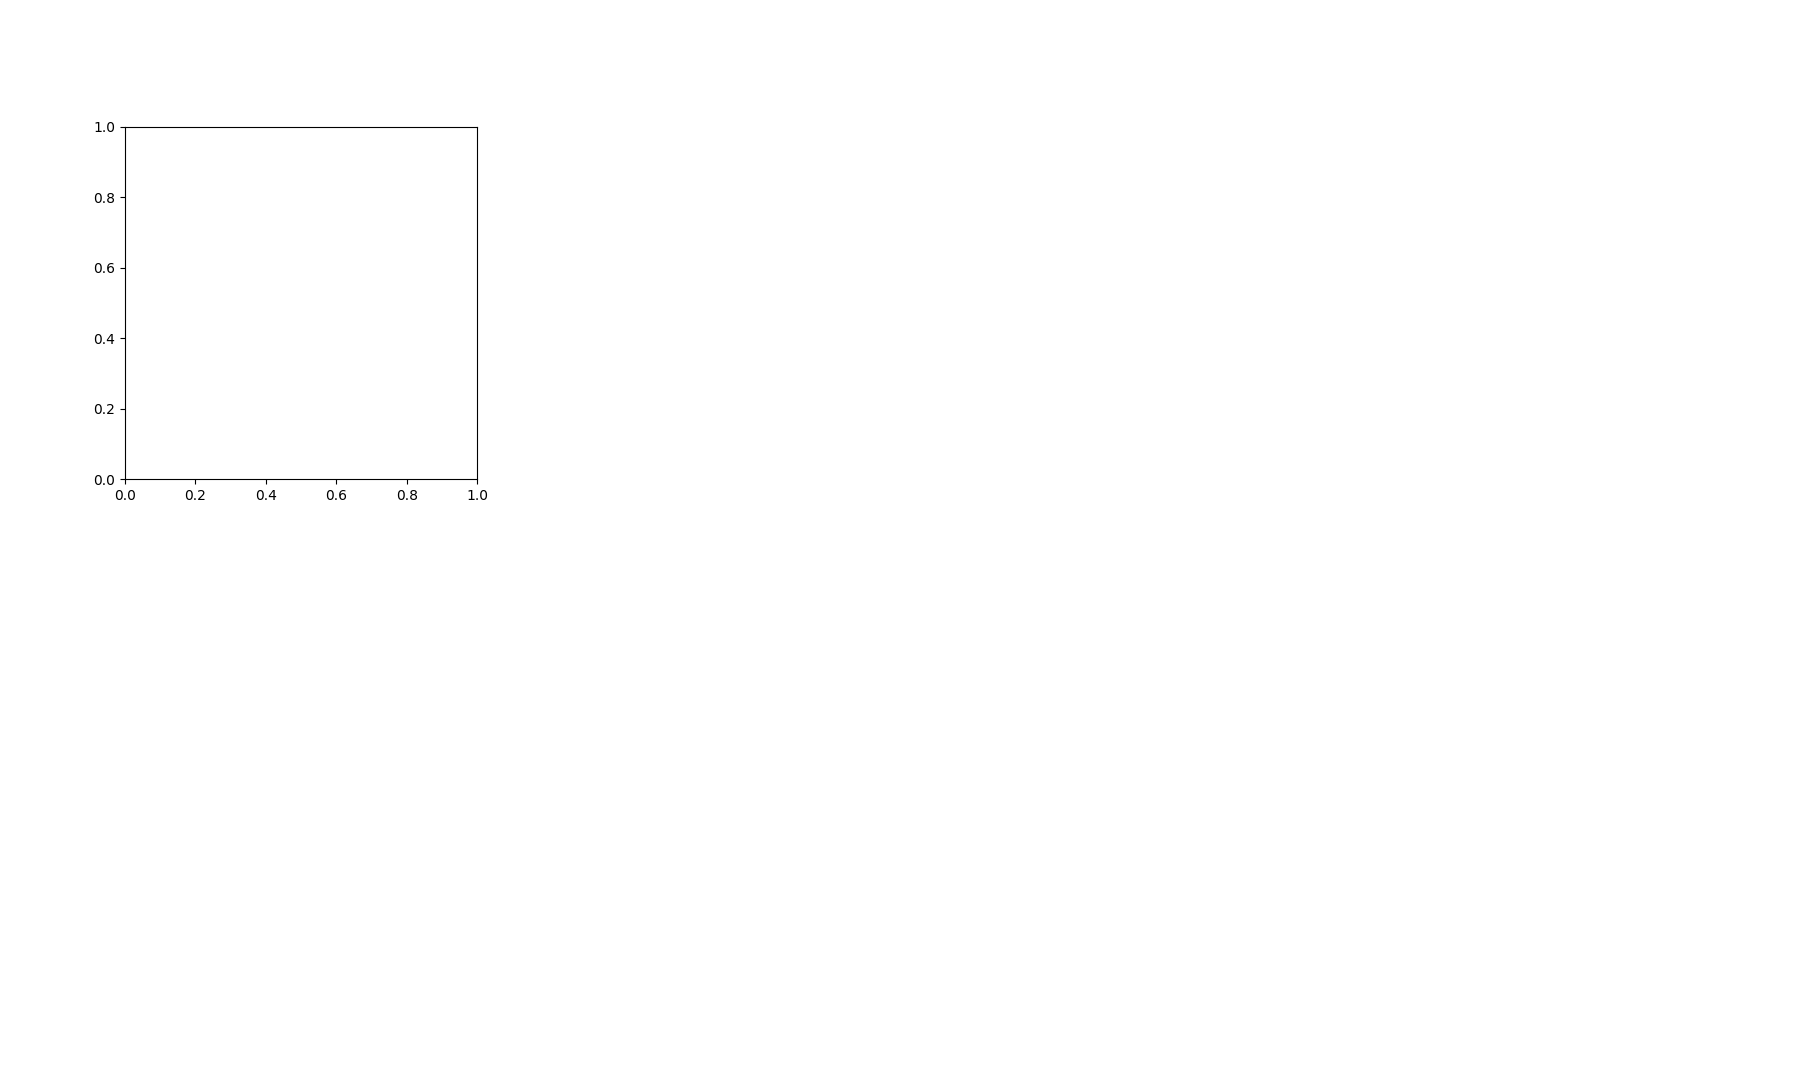

KeyError: 'Total Count'

In [38]:
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_dataframe.plot(kind='pie', y = "Total Count", ax=ax1, autopct='%1.1f%%', 
startangle=90, shadow=False, labels=gender_dataframe['Sex'], legend = False)

#  Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens_df = pymaceuticals_clean.loc[(pymaceuticals_clean["Drug Regimen"] == "Capomulin") | (pymaceuticals_clean["Drug Regimen"] == "Ramicane") | 
                                      (pymaceuticals_clean["Drug Regimen"] == "Infubinol") | (pymaceuticals_clean["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
regimens_df = regimens_df.groupby('Mouse ID').max()['Timepoint']
regimens_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Come back and round
tumor_df = pd.merge(pymaceuticals_data, regimens_df, on=("Mouse ID","Timepoint"),how="right")
tumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset 
    # Determine outliers using upper and lower bounds
    
    
for drug in treatments:
    tumor_vol = tumor_df.loc[tumor_df['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol)
    print(drug)
    quantiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quantiles[0.25]
    upperq = quantiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"The lower quartile of is: {lowerq}")
    print(f"The upper quartile of is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median is: {quantiles[0.5]}")
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    print(f"Outliers are: {tumor_vol.loc[(tumor_vol<lower_bound) | (tumor_vol>upper_bound)]}")
    print()
    print()
    print()

Capomulin
The lower quartile of is: 32.37735684
The upper quartile of is: 40.1592203
The interquartile range is: 7.781863460000004
The the median is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)



Ramicane
The lower quartile of is: 31.56046955
The upper quartile of is: 40.65900627
The interquartile range is: 9.098536719999998
The the median is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)



Infubinol
The lower quartile of is: 54.04860769
The upper quartile of is: 65.52574285
The interquartile range is: 11.477135160000003
The the median is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Outliers are: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64



Ce

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse')
ax1.set_ylabel('Tumor Vol')
ax1.boxplot(tumor_vol_data, labels=treatments)
plt.show()
plt.savefig("Final Tumor Volume of Each Mouse - Box Plots.png")

<IPython.core.display.Javascript object>

# Line and Scatter Plots

In [24]:
 # Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
vol_data = tumor_df[(tumor_df["Drug Regimen"] == "Capomulin") & (tumor_df["Mouse ID"] == "y793")]
vol_data = tumor_df.groupby(["Drug Regimen", "Timepoint"])
tumor_index_df = vol_data_df.unstack(0)
tumor_line_df = tumor_index_df["Tumor Volume (mm3)"]

timepoints = [0,5,10,15,20,25,30,35,40,45,50]

tumor_line_df.plot.line(timepoints, tumor_line_df["Capomulin"], marker= "o", color="green", label="Total Tumor Volume")

NameError: name 'vol_data_df' is not defined

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

 # Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen